<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/week12_readings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("nycflights13")
library(nycflights13)
library(tidyverse)
options(repr.plot.width = 5, repr.plot.height = 4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Week 12 Readings

## 27: Functions

**3 useful types of functions:**
1. Vectors
  * Input = vector(s)
  * Output = vector
2. Data frame
  * Input = data frame
  * Output = data frame
3. Plot
  * Input = data frame 
  * output = plot 

**Reasons to learn how to write functions, rather than copying and pasting:**

1. Prevents typos 
2. Allows you to make many histograms of many variables very quickly


**How to write functions:**
1. Analyze your repeated code to figure what parts are constant and what parts vary 
  * Replace the bits that vary with a black box 
2. Know the 3 things that are needed for functions:
  1. Name
  2. Arguments
  3. Body 
3. Tips:
  * Make a common pattern easier to remember by giving it a memorable name 

### Vector functions

In [ ]:
# Function Template:
# name<-function(arguments{
#   body
# })

# Manual Ex:
df<-tibble(
  a=rnorm(5),
  b=rnorm(5),
  c=rnorm(5),
  d=rnorm(5),
)

df%>%
  mutate(
    a=(a-min(a,na.rm=TRUE))/(max(a,na.rm=TRUE)-min(a,na.rm=TRUE)),
    b=(b-min(b,na.rm=TRUE))/(max(b,na.rm=TRUE)-min(b,na.rm=TRUE)),
    c=(c-min(c,na.rm=TRUE))/(max(c,na.rm=TRUE)-min(c,na.rm=TRUE)),
    d=(d-min(d,na.rm=TRUE))/(max(d,na.rm=TRUE)-min(d,na.rm=TRUE)),
  )

# Function Ex: 
rescale01<-function(x){
  (x-min(x,na.rm=TRUE))/(max(x,na.rm=TRUE)-min(x,na.rm=TRUE))
}

df%>%
  mutate(
    a=rescale01(a),
    b=rescale01(b),
    c=rescale01(c),
    d=rescale01(d),
  )

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
1.00000000,1.0000000,0.3445241,0.7915437
0.00000000,0.0000000,0.7499331,0.5268120
0.26262998,0.5617231,1.0000000,0.3365725
0.17659964,0.7836948,0.0000000,0.0000000
0.05436361,0.8596389,0.3951039,1.0000000


a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
1.00000000,1.0000000,0.3445241,0.7915437
0.00000000,0.0000000,0.7499331,0.5268120
0.26262998,0.5617231,1.0000000,0.3365725
0.17659964,0.7836948,0.0000000,0.0000000
0.05436361,0.8596389,0.3951039,1.0000000


**Mutate functions**

Functions that work well inside `mutate()` and `filter()` 

In [ ]:
# Z-score: rescales a vector to have a mean of zero & a sd of one 

z_score<-function(x){
  (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [ ]:
# Clamp: ensures all values of a vector lie b/w a min & max

clamp<-function(x,min,max){
  case_when(
    x<min~min,
    x>max~max,
    .default=x
  )
}

clamp(1:10,min=3,max=7) # produces only the values within the range

# na_outside(1:10,min=3,max=7) marks the values outside the range as NAs

[1] 3 3 3 4 5 6 7 7 7 7

In [ ]:
# Make first character upper case:

first_upper<-function(x){
  str_sub(x,1,1)<-str_to_upper(str_sub(x,1,1))
  x
}

first_upper("hello")

[1] "Hello"

In [ ]:
# Remove % , $ from a string before converting into number:

clean_number<-function(x){
    is_pct<-str_detect(x,"%")
    num<-x%>%
      str_remove_all("%")%>%
      str_remove_all(",")%>%
      str_remove_all(fixed("$"))%>%
      as.numeric(x)
    if_else(is_pct,num/100,num)
}

clean_number("$12,300")
clean_number("45%")

[1] 12300

[1] 0.45

In [ ]:
# Replace missing values that are recorded as 999 w NA:
fix_na<-function(x){
  if_else(x %in% c(999),NA,x)
}

**Summary functions**

Functions that return a single value in `summarize()`

In [ ]:
# # Add commas:

# commas <- function(x) {
#   str_flatten(x, collapse = ",", last = " and ")
# }

# commas(c("cat","dog","pigeon"))

### Data frame functions

**Embracing a variable**

To wrap it in braces 

`{{ var }}` 

**When to embrace:**
* **Data-masking:** in functions that compute w vars like `arrange()`, `filter()`, and `summarize()` 
* **Tidy-selection:** in functions that select vars like `select()`, `relocate()`, and `rename()` 

In [ ]:
# Mean of a group: 

grouped_mean<-function(df,group_var,mean_var){
  df%>%
    group_by({{group_var}})%>%
    summarize(mean({{mean_var}}))
}

diamonds%>%
  grouped_mean(cut,carat)

cut,mean(carat)
<ord>,<dbl>
Fair,1.0461366
Good,0.8491847
Very Good,0.8063814
Premium,0.8919549
Ideal,0.7028370


In [ ]:
# Common case: 
# Count() that computes proportions:

count_prop<-function(df,var,sort=FALSE){
  df%>%
    count({{var}},sort=sort)%>%
    mutate(prop=n/sum(n))
}

diamonds%>%
  count_prop(clarity)

clarity,n,prop
<ord>,<int>,<dbl>
I1,741,0.01373749
SI2,9194,0.17044865
SI1,13065,0.24221357
VS2,12258,0.22725250
VS1,8171,0.15148313
VVS2,5066,0.09391917
VVS1,3655,0.06776047
IF,1790,0.03318502


In [ ]:
# Common case: 
# Unique values in a data set:

unique_where<-function(df,condition,var){
  df%>%
    filter({{condition}})%>%
    distinct({{var}})%>%
    arrange({{var}})
}

In [ ]:
# Ex:

flights_sub<-function(rows,cols){
  flights%>%
    filter({{rows}})%>%
    select(time_hour,carrier,flight,{{cols}})
}

flights_sub(dest=="IAH",contains("time"))

time_hour,carrier,flight,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<dttm>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
2013-01-01 05:00:00,UA,1545,517,515,830,819,227
2013-01-01 05:00:00,UA,1714,533,529,850,830,227
2013-01-01 06:00:00,UA,496,623,627,933,932,229
2013-01-01 07:00:00,UA,473,728,732,1041,1038,238
2013-01-01 07:00:00,UA,1479,739,739,1104,1038,249
2013-01-01 09:00:00,UA,1220,908,908,1228,1219,233
2013-01-01 10:00:00,UA,1004,1028,1026,1350,1339,237
2013-01-01 10:00:00,UA,455,1044,1045,1352,1351,229
2013-01-01 09:00:00,UA,1086,1114,900,1447,1222,248


### Plot functions 

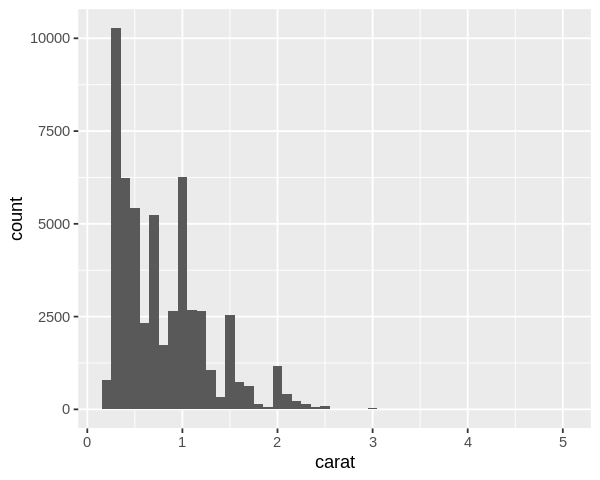

In [ ]:
# Many histograms 

histogram<-function(df,var,binwidth=NULL){
  df%>%
    ggplot(aes(x={{var}}))+
    geom_histogram(binwidth=binwidth)
}

diamonds%>%
  histogram(carat,0.1)

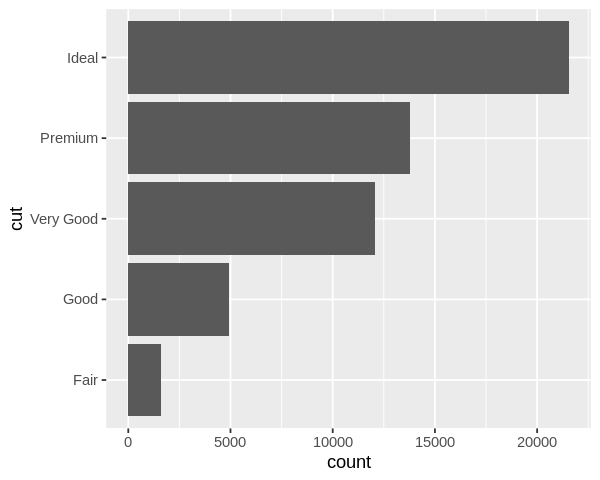

In [ ]:
# Bar chart where you automatically sort bars in frequency order

sorted_bars<-function(df,var){
  df%>%
    mutate({{var}}:=fct_rev(fct_infreq({{var}})))%>%
    ggplot(aes(y={{var}}))+
    geom_bar()
}

diamonds%>%
  sorted_bars(cut)

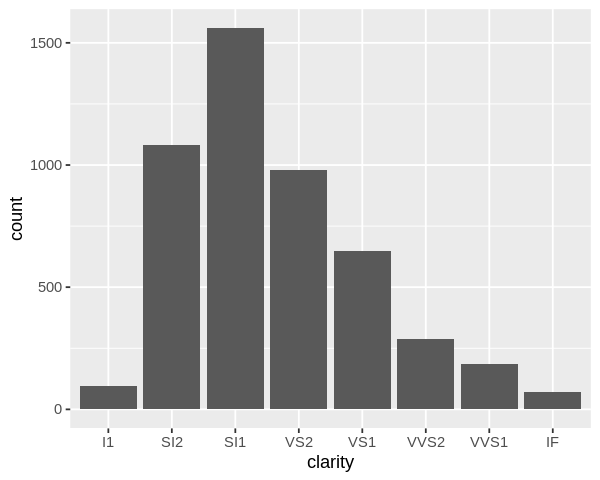

In [ ]:
# Bar chart for just a subset:

conditional_bars<-function(df,condition,var){
  df%>%
    filter({{condition}})%>%
    ggplot(aes(x={{var}}))+
    geom_bar()
}

diamonds%>%
  conditional_bars(cut=="Good",clarity)

## 28: Interation

**Iteration:** repeatedly performing the same action on different objects

Examples:
* `facet_wrap()` & `facet_grid()`: draws a plot for ech subset
* `group_by()` + `summarize()`: computes a summary statistics for ech subset
* `unnest_wider()` & `unnest_longer()`: create new rows and cols for ech elemtent

**Functional programming:** built around functions that take other functions as inputs 

**Count the number of observations & compute the median of every col:**

In [ ]:
df<-tibble(
  a=rnorm(10),
  b=rnorm(10),
  c=rnorm(10),
  d=rnorm(10)
)

In [ ]:
# Manual
df%>%summarize(
  n=n(),
  a=median(a),
  b=median(b),
  c=median(c),
  d=median(d),
)

n,a,b,c,d
<int>,<dbl>,<dbl>,<dbl>,<dbl>
10,-0.06868012,-0.277095,-0.1419439,0.9231225


**Across**

`across(.cols - which cols you want to iterate over, .fns - what to do w ech col, .names - use when you need additional control over the names of the output cols)`

In [ ]:
# Summarize w across
df%>%
  summarize(
  n=n(),
  across(a:d,median),
)

n,a,b,c,d
<int>,<dbl>,<dbl>,<dbl>,<dbl>
10,-0.06868012,-0.277095,-0.1419439,0.9231225


**Functions** that are useful for `across()` & `select()`: 
* `starts_with()` 
* `ends_with()`
* `everything()`
* `where()`

In [ ]:
df<-tibble(
  grp=sample(2,10,replace=TRUE),
  a=rnorm(10),
  b=rnorm(10),
  c=rnorm(10),
  d=rnorm(10)
)

In [ ]:
# Summarize w across w everything
df%>%
  group_by(grp)%>%
  summarize(across(everything(),median))
# grouping columns here are not included in the across b/c they're automatically preserved by summarize

grp,a,b,c,d
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.04633077,-1.2705335,-0.4257304,0.5368296
2,0.34096628,0.2330597,1.1186575,0.2758161


`where()`: allows you to select cols based on their type
* `where(is.numeric)`: selects all numeric cols
* `where(is.character)`: string 
* `where(is.Date)`
* `where(is.POSIXct)`: date-time  
* `where(is.logical)`: logical  

In [ ]:
df_types<-tibble(
  x1=1:3,
  x2=runif(3),
  y1=sample(letters,3),
  y2=c("banana","apple","egg")
)

In [ ]:
# Summarize w across w where 
df_types%>%
  summarize(across(where(is.character),str_flatten))

y1,y2
<chr>,<chr>
pog,bananaappleegg


**Shortcut:** `function(x)` = `\(x)`

`.names` argument could be important b/c by default, the output is given the same names as the input. 

So if you use across inside mutate, it will replace the existing columns. 

You'd likely want to create new cols instead. 

In [ ]:
rnorm_na<-function(n,n_na,mean=0,sd=1){
  sample(c(rnorm(n-n_na,mean=mean,sd=1),rep(NA,n_na)))
}

df_miss<-tibble(
  a=rnorm_na(5,1),
  b=rnorm_na(5,1),
  c=rnorm_na(5,2),
  d=rnorm(5)
)

In [ ]:
# Across w names 
df_miss%>%
  summarize(
  across(a:d,list(
    median=\(x)median(x,na.rm=T),
    n_miss=\(x)sum(is.na(x))
  ),
    .names="{.fn}_{.col}"
  ),
  n=n(),
  )

median_a,n_miss_a,median_b,n_miss_b,median_c,n_miss_c,median_d,n_miss_d,n
<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
-1.195664,1,0.5636184,1,-1.117516,2,-0.229491,0,5


`across()` is great for `summarize()` and `mutate()` but awk for others.

`if_any()` and `if_all()` are great for filter().

In [ ]:
# Filter w if any  

# Manual
df_miss%>%
  filter(is.na(a)|is.na(b)|is.na(c)|is.na(d))

# Auto 
df_miss%>%
  filter(if_any(a:d,is.na))

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
NA,0.4622093,NA,-0.122125
-1.590655,NA,NA,-0.413999


a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
NA,0.4622093,NA,-0.122125
-1.590655,NA,NA,-0.413999


In [ ]:
# Filter w if all  

# Manual
df_miss%>%filter(is.na(a)&is.na(b)&is.na(c)&is.na(d))

# Auto 
df_miss%>%filter(if_all(a:d,is.na))

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>


a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




When there are multiple columns with multiple uinque values (in this case, there are multiple medians and means); the `names_vary` changes the way in which the resulting combined columns are named.

"slowest" causes the resulting columns to be combined and named "value1_name1, value2_name1, value1_name2, value2_name2". This is why the a's, b's, c's, and d's are grouped together in this case.

"fastest" causes the resulting columns to be combined and named "value1_name1, value1_name2, value2_name1, value2_name2". This is the default. In our case, our tibble columns would've been named a_median, b_median, etc; instead. 

In [ ]:
df_paired<-tibble(
  a_val=rnorm(10),
  a_wts=runif(10),
  b_val=rnorm(10),
  b_wts=runif(10),
  c_val=rnorm(10),
  c_wts=runif(10),
  d_val=rnorm(10),
  d_wts=runif(10)
)

In [ ]:
# Pivot longer, then across
df_long<-df_paired%>%
  pivot_longer(
  everything(),
  names_to=c("group",".value"),
  names_sep="_"
  )%>%
    print

df_long%>%
  group_by(group)%>%
  summarize(mean=weighted.mean(val,wts))

# A tibble: 40 × 3
   group    val    wts
   <chr>  <dbl>  <dbl>
 1 a     -0.368 0.303 
 2 b     -2.71  0.668 
 3 c      0.151 0.777 
 4 d      0.373 0.607 
 5 a      2.71  0.473 
 6 b      1.43  0.0672
 7 c     -0.326 0.866 
 8 d     -0.442 0.108 
 9 a      0.283 0.107 
10 b      0.605 0.233 
# … with 30 more rows


group,mean
<chr>,<dbl>
a,0.18577999
b,-0.27452380
c,-0.14221357
d,-0.03592098


### Multiple files

**Reading**

In [ ]:
data2019<-readxl::read_excel("file1.xlsx")
data2020<-readxl::read_excel("file2.xlsx")
data2021<-readxl::read_excel("file3.xlsx")
data2022<-readxl::read_excel("file4.xlsx")

In [ ]:
# bind_rows & rbind combines all files into a single df 
data<-bind_rows(data2019,data2020,data2021,data2022)

`list.files(path,pattern,full.names)`: lists all the files in a directory 

* path: the directory to look in
* pattern: regular expression used to filter the file names. The most common are `[.]xlsx$` or `[.]csv$` 
* full.names: determines whether or not the directory name should be included in the output. You almost always want this to be T


`purrr::map()`: read each of the files into a list 

In [ ]:
# Manual

# Find all files:
paths<-list.files(path="data/gapminder",pattern="[.]xlsx$",full.names=T)

# Read all files:
gapminder_1952<-readx1::read_excel("data/gapminder/1952.xlsx")
...,
gapminder_2007<-readx1::read_excel("data/gapminder/2007.xlsx")

# List all files:
files<-list(
  readx1::read_excel("data/gapminder/1952.xlsx"),
  ...,
  readx1::read_excel("data/gapminder/2007.xlsx")
)

# Use files[[i]] to extract the i-th file 

# Map all files into a list to know which element to extract:
files<-map(paths,readx1::read_excel)
files[1]

# Combine all files into a single df:
list_rbind(files)

**Saving**

In [ ]:
# Save your csv file
write_csv(gapminder,"gapminder.csv")

In [ ]:
# Save your plot
ggsave(by_clarity$path[[1]],by_clarity$plot[[1]],width=6,height=6)